In [ ]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt				    score.csv
 매수종목2.txt				    sonar.csv
'2. 영화평점, 날짜별 영화평점 시각화.zip'  'stock-data (1).csv'
 atlas-higgs-challenge-2014-v2.csv.gz	    stock-data.csv
 auto-mpg.csv				   'stock price.xlsx'
 bmi_500.csv				    stock_px.csv
 cosmetics_.csv				   'stock valuation.xlsx'
 cosmetics_.xlsx			    test.csv
 creative_commons_elephant.jpg		    test.db.db
 매수종목.csv				    test.txt
 database				    ThoraricSurgery.csv
 data_studentlist_en.csv		    titanic_test.csv
 demo.docx				    titanic_train.csv
 example.docx				    titanic.xls
 heart_disease.csv			    titanic.xlsx
 height_weight.txt			    Titanic배포용.zip
 HelloWorld.xlsx			    tmdb_5000_credits.csv
 house_price.csv			    tmdb_5000_movies.csv
 머신러닝_모델_협업_개발_프로세스.jpg	    Traffic_Accident_2017.csv
 lenna.png				    train.csv
 little-char.png			    user_id_mean.csv
 ml-latest-small.zip			   'wine(1).csv'
 population_number.csv			    wine.csv
 ram_price.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv(drive_path + 'wine_train.csv').iloc[:, 1:]

# 2가지로 나누자. red와 white를 따로 다루고, y를 quality로 두는거야.
red = df[df['type'] == 'red'].iloc[:, :-1]
white = df[df['type'] == 'white'].iloc[:, :-1]
display(red.head())
display(white.head())

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1,5,8.8,0.61,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5
10,6,8.0,0.18,0.37,0.9,0.049,36.0,109.0,0.99007,2.89,0.44,12.7
14,5,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5
16,5,8.8,0.37,0.48,2.1,0.097,39.0,145.0,0.99750,3.04,1.03,9.3
21,5,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
5,6,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0


In [ ]:
white_3 = white[(3 < white['quality']) & (white['quality'] < 9)]
white_3

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9
5,6,6.0,0.190,0.37,9.7,0.032,17.0,50.0,0.99320,3.08,0.66,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,5,7.7,0.150,0.29,1.3,0.029,10.0,64.0,0.99320,3.35,0.39,10.1
5493,6,6.3,0.180,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0
5494,7,7.8,0.150,0.34,1.1,0.035,31.0,93.0,0.99096,3.07,0.72,11.3
5495,5,6.6,0.410,0.31,1.6,0.042,18.0,101.0,0.99195,3.13,0.41,10.5


In [ ]:
X, y = white_3.iloc[:, 1:], white_3.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3,
                                                    random_state=0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

2895 1242 2895 1242


# 분류 : quality

In [ ]:
!pip install imbalanced-learn==0.7.0

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
from collections import Counter

In [ ]:
from imblearn.over_sampling import SMOTE

# 그리드 서치



###  svm

In [ ]:
from matplotlib import pyplot

In [ ]:
# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=5, n=1217 (29.262%)
Class=6, n=1881 (45.227%)
Class=7, n=755 (18.153%)
Class=8, n=139 (3.342%)
Class=4, n=145 (3.486%)
Class=9, n=5 (0.120%)
Class=3, n=17 (0.409%)


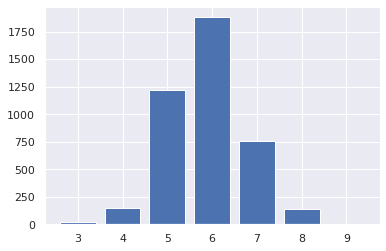

In [ ]:
count_and_plot(y)

Class=5, n=1881 (20.000%)
Class=6, n=1881 (20.000%)
Class=7, n=1881 (20.000%)
Class=8, n=1881 (20.000%)
Class=4, n=1881 (20.000%)


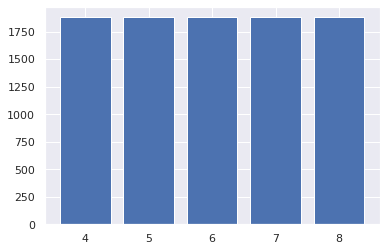

In [ ]:
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

In [ ]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=.3,
                                                    random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, 
                                                    y_trainval, 
                                                    test_size=.3,
                                                    random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVR

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        model = SVC(gamma=gamma, C=C).fit(X_train, y_train)
        score = model.score(X_val, y_val)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}

best_score, best_parameters

(0.759493670886076, {'C': 100, 'gamma': 0.1})

In [ ]:
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가
model = SVC(**best_parameters).fit(X_trainval, y_trainval)
model.score(X_trainval, y_trainval), model.score(X_test, y_test)

(1.0, 0.8196314670446492)

In [ ]:
display(white[white.quality == 5].iloc[:, :-1])
len(white[white.quality == 5].iloc[:, :-1])

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,5,5.6,0.695,0.06,6.80,0.042,9.0,84.0,0.99432,3.44,0.44
2,5,7.9,0.210,0.39,2.00,0.057,21.0,138.0,0.99176,3.05,0.52
6,5,6.1,0.220,0.49,1.50,0.051,18.0,87.0,0.99280,3.30,0.46
8,5,6.8,0.240,0.31,18.30,0.046,40.0,142.0,1.00000,3.30,0.41
9,5,6.8,0.390,0.35,11.60,0.044,57.0,220.0,0.99775,3.07,0.53
...,...,...,...,...,...,...,...,...,...,...,...
5484,5,6.8,0.260,0.29,16.95,0.056,48.0,179.0,0.99980,3.45,0.40
5486,5,6.6,0.280,0.41,7.00,0.046,59.0,194.0,0.99558,3.14,0.48
5488,5,7.6,0.270,0.32,1.20,0.043,23.0,72.0,0.99236,3.06,0.68
5492,5,7.7,0.150,0.29,1.30,0.029,10.0,64.0,0.99320,3.35,0.39


1217

In [ ]:
model.predict(white[white.quality == 7].iloc[:, 1:])

array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 6, 7, 7, 7, 7,
       5, 7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,

In [ ]:
from sklearn.svm import SVR

svm_poly_reg=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

SVR(C=100, degree=2, kernel='poly')

In [ ]:
svm_poly_reg.predict(white[white.quality == 4].iloc[:, 1:])

array([ 4.47009455,  5.63975614,  4.23074616,  4.72869277,  4.39356651,
        5.3709528 ,  5.96906349,  3.89829737,  5.87315004,  3.90754919,
        4.76161687,  5.90404897,  5.37383071,  4.64723797,  5.16569836,
        5.72807832,  4.94780656, -0.91715671,  4.40698598,  4.52601188,
        5.16569836,  5.74526416,  4.56706906,  4.24219894,  5.13945962,
        4.58297394,  5.00025636,  4.92617257,  4.17037799,  4.42735643,
        5.02015199,  5.43391712,  5.52652997,  5.52652997,  5.96630292,
        4.62935928,  5.69322644,  4.20822701,  5.28672863,  5.13945962,
        5.75736554,  4.45141298,  5.05436927,  4.52552215,  4.37892103,
        4.63912702,  4.44367389,  3.87827688,  4.16880658,  5.15412183,
        4.64370871,  4.08222099,  5.83599684,  5.1244675 ,  4.72172372,
        5.26024531,  4.30583249,  4.16552568,  4.98153518,  4.3233931 ,
        4.8133722 ,  5.4819428 ,  4.84637799,  3.76698259,  4.44287103,
        5.03372183,  4.71256056,  5.21933875,  4.91322371,  3.88

In [ ]:
from sklearn.metrics import mean_squared_error 
y_pred = svm_poly_reg.predict(X_test)
MSE = mean_squared_error(y_test, y_pred) 
np.sqrt(MSE)

1.0683969601856123

In [ ]:
X, y = white_3.iloc[:, 1:], white_3.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=.3,
                                                    random_state=0)

print(len(X_train), len(X_test), len(y_train), len(y_test))

2895 1242 2895 1242


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

gs = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [ ]:
gs.score(X_test, y_test)

0.5909822866344605